# Use yolo data to train a model

In [1]:
import os
os.chdir("..")
ROOT = os.getcwd()
print("ROOT:", ROOT)

ROOT: /Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_03_Papers/2023/finding_ants


In [4]:
DIR_DATA = os.path.join(ROOT, "data", "yolo_ant", "data.yaml")
DIR_MODEL = os.path.join(ROOT, "models", "yolov8m.pt")

In [5]:
from ultralytics import YOLO

In [6]:
# set pretrain
model = YOLO(DIR_MODEL)
model.train(data=DIR_DATA, epochs=5, batch=16, imgsz=640, device="mps", save_period=1)

New https://pypi.org/project/ultralytics/8.0.105 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.99 🚀 Python-3.9.16 torch-2.0.1 MPS
yolo/engine/trainer: task=detect, mode=train, model=/Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_03_Papers/2023/finding_ants/models/yolov8m.pt, data=/Users/niche/Library/CloudStorage/OneDrive-VirginiaTech/_03_Papers/2023/finding_ants/data/yolo_ant/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, s

In [7]:
from detections import Niche_Batch
PATH_IMG = os.path.join(ROOT, "data", "raw", "fire_ant_activity", "A1", "A1_1.JPEG")
PATH_FT = os.path.join(ROOT, "runs", "detect", "train", "weights", "best.pt")
batch = Niche_Batch(PATH_IMG)
batch.tile_images()
batch.yolo_detect(PATH_FT, device="mps", thred=1)



0: 640x640 1 ant, 1: 640x640 1 ant, 2: 640x640 1 ant, 3: 640x640 1 ant, 4: 640x640 1 ant, 5: 640x640 2 ants, 6: 640x640 1 ant, 7: 640x640 2 ants, 8: 640x640 1 ant, 9: 640x640 1 ant, 10: 640x640 1 ant, 11: 640x640 1 ant, 12: 640x640 1 ant, 13: 640x640 1 ant, 14: 640x640 1 ant, 15: 640x640 1 ant, 16: 640x640 1 ant, 17: 640x640 1 ant, 18: 640x640 1 ant, 19: 640x640 1 ant, 20: 640x640 1 ant, 21: 640x640 1 ant, 22: 640x640 1 ant, 23: 640x640 1 ant, 24: 640x640 1 ant, 25: 640x640 1 ant, 26: 640x640 (no detections), 27: 640x640 1 ant, 28: 640x640 1 ant, 29: 640x640 1 ant, 30: 640x640 1 ant, 31: 640x640 2 ants, 32: 640x640 1 ant, 33: 640x640 1 ant, 34: 640x640 1 ant, 35: 640x640 1 ant, 36: 640x640 1 ant, 37: 640x640 1 ant, 38: 640x640 1 ant, 39: 640x640 1 ant, 40: 640x640 (no detections), 41: 640x640 1 ant, 42: 640x640 1 ant, 43: 640x640 1 ant, 44: 640x640 1 ant, 45: 640x640 1 ant, 46: 640x640 1 ant, 47: 640x640 1 ant, 48: 640x640 1 ant, 49: 640x640 1 ant, 50: 640x640 1 ant, 51: 640x640 1 ant

threshold: 410228.46875


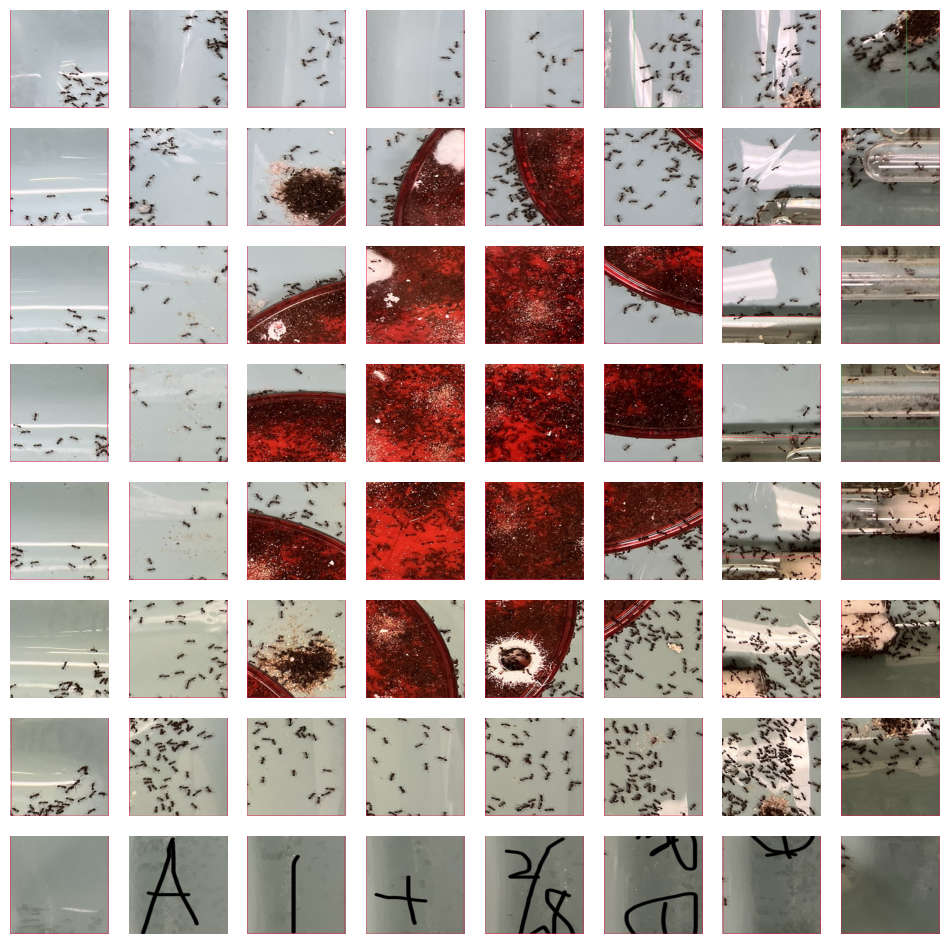

In [8]:
batch.plot_detect_grid()

In [21]:
import supervision as sv
sv.plot_images_grid(batch.ls_tiles, grid_size=(batch.rate, batch.rate))

<Figure size 1200x1200 with 64 Axes>

In [7]:
model_ft = YOLO(os.path.join(ROOT, "runs", "detect", "train", "weights", "best.pt"))

In [ ]:
results = model_ft.predict()